In [2]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


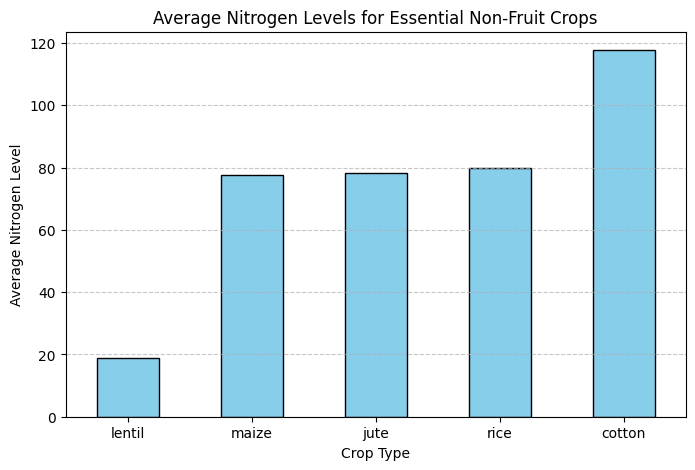

In [9]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt

zip_path = "archive.zip"

with zipfile.ZipFile(zip_path, "r") as z:
    with z.open("Crop_recommendation.csv") as f:
        df = pd.read_csv(f)

essential_crops = ["rice", "wheat", "maize", "cotton", "jute", "lentil"]

filtered_df_essential = df[df["label"].isin(essential_crops)]

avg_nitrogen_per_essential_crop = filtered_df_essential.groupby("label")["Nitrogen"].mean().sort_values()

plt.figure(figsize=(8, 5))
avg_nitrogen_per_essential_crop.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Crop Type")
plt.ylabel("Average Nitrogen Level")
plt.title("Average Nitrogen Levels for Essential Non-Fruit Crops")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


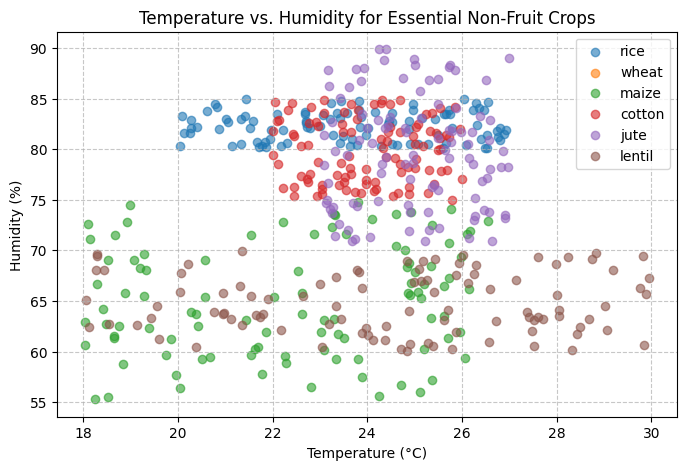

In [10]:
plt.figure(figsize=(8, 5))

for crop in essential_crops:
    crop_data = filtered_df_essential[filtered_df_essential["label"] == crop]
    plt.scatter(crop_data["temperature"], crop_data["humidity"], label=crop, alpha=0.6)

plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.title("Temperature vs. Humidity for Essential Non-Fruit Crops")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

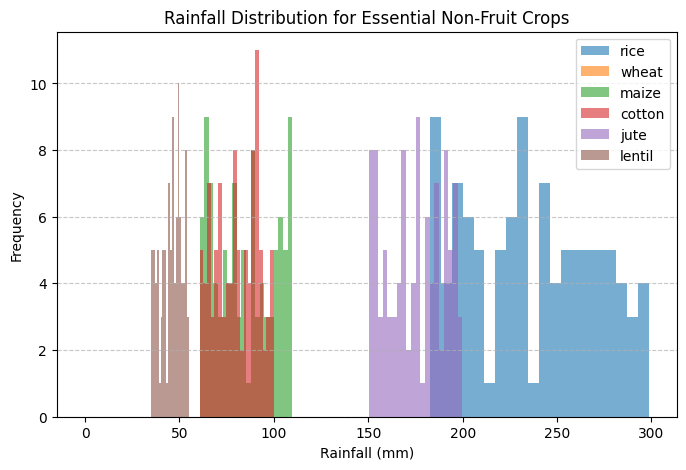

<Figure size 800x500 with 0 Axes>

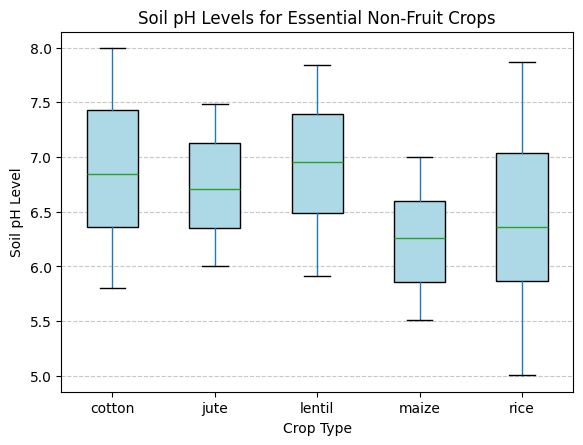

In [5]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load the dataset from the ZIP file
zip_path = "archive.zip"  # Update this path if needed

with zipfile.ZipFile(zip_path, "r") as z:
    with z.open("Crop_recommendation.csv") as f:
        df = pd.read_csv(f)

# ✅ Define essential non-fruit crops
essential_crops = ["rice", "wheat", "maize", "cotton", "jute", "lentil"]

# ✅ Filter the dataset for only the selected essential crops
filtered_df_essential = df[df["label"].isin(essential_crops)]

# 🔹 Plot 1: Rainfall Distribution for Essential Non-Fruit Crops
plt.figure(figsize=(8, 5))
for crop in essential_crops:
    crop_data = filtered_df_essential[filtered_df_essential["label"] == crop]
    plt.hist(crop_data["rainfall"], bins=20, alpha=0.6, label=crop)

plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.title("Rainfall Distribution for Essential Non-Fruit Crops")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 🔹 Plot 2: Soil pH Levels for Essential Crops (Boxplot)
plt.figure(figsize=(8, 5))
filtered_df_essential.boxplot(column=["ph"], by="label", grid=False, patch_artist=True,
                              boxprops=dict(facecolor="lightblue"))
plt.xlabel("Crop Type")
plt.ylabel("Soil pH Level")
plt.title("Soil pH Levels for Essential Non-Fruit Crops")
plt.suptitle("")  # Remove default title from pandas boxplot
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



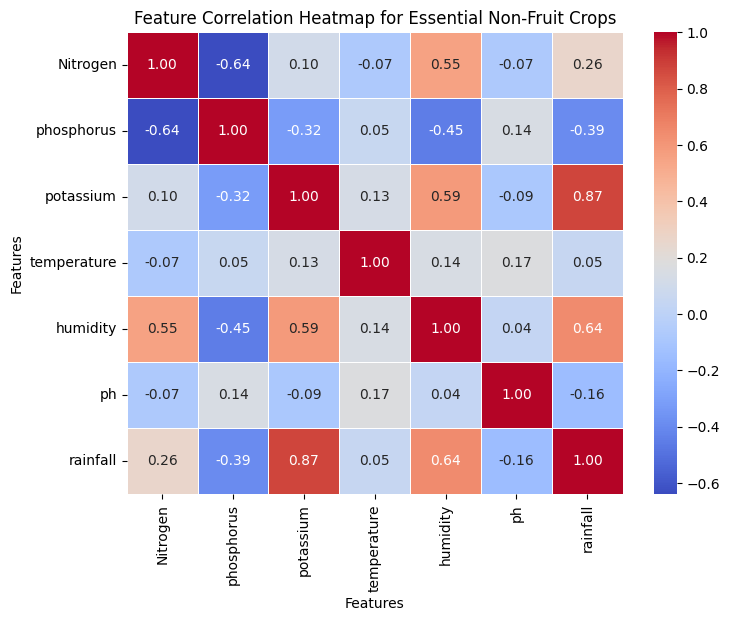

In [6]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load the dataset from the ZIP file
zip_path = "archive.zip"  # Update this path if needed

with zipfile.ZipFile(zip_path, "r") as z:
    with z.open("Crop_recommendation.csv") as f:
        df = pd.read_csv(f)

# ✅ Define essential non-fruit crops
essential_crops = ["rice", "wheat", "maize", "cotton", "jute", "lentil"]

# ✅ Filter the dataset for only the selected essential crops
filtered_df_essential = df[df["label"].isin(essential_crops)]

# ✅ Remove unnamed columns if they exist
filtered_df_essential = filtered_df_essential.loc[:, ~filtered_df_essential.columns.str.contains('^Unnamed')]

# ✅ Compute correlation matrix after removing unnecessary columns
correlation_matrix = filtered_df_essential.drop(columns=["label"]).corr()

# 🔹 Create a heatmap with correct axis alignment
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=True)

# Title and labels
plt.title("Feature Correlation Heatmap for Essential Non-Fruit Crops")
plt.xlabel("Features")
plt.ylabel("Features")

# Show the heatmap
plt.show()


In [7]:
##Analysis##
##If humidity is high, recommend crops that can absorb more nitrogen efficiently.##
##In low-rainfall areas, ensure crops have enough potassium supplements.##
##Avoid over-fertilizing with both nitrogen and phosphorus together, as they are negatively correlated.##

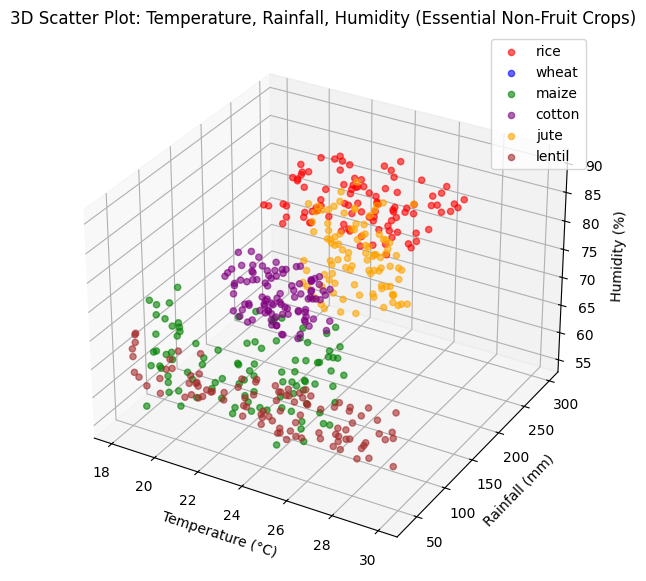

In [4]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

zip_path = "archive.zip"

with zipfile.ZipFile(zip_path, "r") as z:
    with z.open("Crop_recommendation.csv") as f:
        df = pd.read_csv(f)

essential_crops = ["rice", "wheat", "maize", "cotton", "jute", "lentil"]

filtered_df_essential = df[df["label"].isin(essential_crops)]

crop_colors = {
    "rice": "red",
    "wheat": "blue",
    "maize": "green",
    "cotton": "purple",
    "jute": "orange",
    "lentil": "brown"
}

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for crop in essential_crops:
    crop_data = filtered_df_essential[filtered_df_essential["label"] == crop]
    ax.scatter(crop_data["temperature"], crop_data["rainfall"], crop_data["humidity"],
               c=crop_colors[crop], label=crop, alpha=0.6)

ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Rainfall (mm)")
ax.set_zlabel("Humidity (%)")
ax.set_title("3D Scatter Plot: Temperature, Rainfall, Humidity (Essential Non-Fruit Crops)")

ax.legend()

plt.show()


In [10]:
import plotly.express as px

fig = px.scatter_3d(filtered_df_essential, x="temperature", y="rainfall", z="humidity",
                    color="label", symbol="label", opacity=0.7,
                    title="Interactive 3D Scatter: Temperature vs Rainfall vs Humidity")
fig.show()


In [15]:
import plotly.express as px

fig = px.parallel_coordinates(filtered_df_essential,
                              dimensions=["Nitrogen", "phosphorus", "potassium", "temperature", "humidity", "ph", "rainfall"],
                              color=filtered_df_essential["label"].astype('category').cat.codes,
                              labels={"label": "Crop Type"},
                              title="Parallel Coordinates Plot for Essential Crops")

# Show the plot
fig.show()


In [16]:
import plotly.express as px

# Create a bubble chart
fig = px.scatter(filtered_df_essential, x="temperature", y="humidity",
                 size="rainfall", color="label",
                 hover_name="label", opacity=0.7,
                 title="Bubble Chart: Temperature vs Humidity (Size = Rainfall)")

# Show the interactive chart
fig.show()
